**Brian Ramírez**


### **Casilla de código base (Ejecute siempre antes de usar el solucionador, no modifique).**

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, sympify, lambdify
from sympy.core.sympify import SympifyError

# ======================================================================
#   IMPLEMENTACIÓN DEL MÉTODO DE LA SECANTE
# ======================================================================

class SecantSolver:

    def __init__(self, f):
        if not callable(f):
            raise TypeError("Error (1): El parámetro 'f' debe ser una función (callable).")
        self.f = f
        self.iterations = 0
        self.root = None
        self.error = None
        self.history = []
        self._initial_x0 = None
        self._initial_x1 = None

    def solve(self, x0, x1, tol=1e-7, max_iter=100):
        self.iterations = 0
        self.root = None
        self.error = None
        self.history = []
        self._initial_x0 = x0
        self._initial_x1 = x1

        if x0 == x1:
            raise ValueError(f"Error (2): Los valores iniciales x0 y x1 no pueden ser iguales. "
                             f"x0={x0}, x1={x1}")

        xk_minus_1 = x0
        xk = x1

        fxk_minus_1 = self.f(xk_minus_1)
        fxk = self.f(xk)

        for i in range(max_iter):
            self.iterations = i + 1

            denominator = (fxk - fxk_minus_1)

            if abs(denominator) < 1e-15:
                raise RuntimeError("Error (3): División por cero: f(xk) - f(xk-1) es cero.")

            xk1 = xk - (fxk * (xk - xk_minus_1)) / denominator
            fxk1 = self.f(xk1)

            current_error_fc = abs(fxk1)
            current_error_step = abs(xk1 - xk)

            self.history.append({
                'iteration': self.iterations,
                'xk': xk1,
                'fxk': fxk1,
                'error': current_error_step
            })

            if current_error_fc < tol:
                self.root = xk1
                self.error = current_error_fc
                return self.root

            xk_minus_1 = xk
            fxk_minus_1 = fxk
            xk = xk1
            fxk = fxk1

        self.root = xk
        self.error = abs(self.f(self.root))

        print(f"\nAdvertencia: Se alcanzó el máximo de iteraciones ({max_iter}) "
              f"sin alcanzar la tolerancia de {tol}.")
        print(f"Mejor aproximación: {self.root} con error |f(c)| de {self.error:.2e}")
        return self.root

    def plot_results(self):
        if self.root is None or not self.history:
            print("Error (4): Ejecute el método 'solve()' antes de intentar graficar.")
            return

        plot_min = min(self._initial_x0, self._initial_x1)
        plot_max = max(self._initial_x0, self._initial_x1)
        padding = abs(plot_max - plot_min) * 0.2
        plot_range_start = plot_min - padding
        plot_range_end = plot_max + padding

        x_vals = np.linspace(plot_range_start, plot_range_end, 500)
        y_vals = np.array([self.f(xi) for xi in x_vals])

        plt.figure(figsize=(12, 5))

        plt.subplot(1, 2, 1)
        plt.plot(x_vals, y_vals, label='f(x)')
        plt.axhline(0, color='gray', linestyle='--', linewidth=0.8, label='y=0')
        plt.axvline(self._initial_x0, color='green', linestyle=':', label='Puntos iniciales (x0, x1)')
        plt.axvline(self._initial_x1, color='green', linestyle=':')
        plt.plot(self.root, self.f(self.root), 'ro', markersize=8, label=f'Raíz encontrada ({self.root:.4f})')
        plt.title('Función y Raíz (Secante)')
        plt.xlabel('x')
        plt.ylabel('f(x)')
        plt.grid(True)
        plt.legend()

        plt.subplot(1, 2, 2)
        iterations = [entry['iteration'] for entry in self.history]
        errors = [abs(entry['fxk']) for entry in self.history]

        plt.semilogy(iterations, errors, '-o', label='Error |f(xk)|')
        plt.title('Convergencia (Secante)')
        plt.xlabel('Iteración')
        plt.ylabel('Error |f(xk)| (log scale)')
        plt.grid(True, which="both", ls="--", c='0.7')
        plt.legend()

        plt.tight_layout()
        plt.show()

### Apartado Soluccionador: Ejecute el siguiente 'bloque' y lea adecuadamente las instrucciones para obtener los resultados esperados. Además, recuerde no modificar el código.

--- Ecuaciones no lineales via método de la secante ---
¡Hola!. Este código te proporcionará una guía paso a paso para encontrar la raíz de tu ecuación.
------------------------------------------------------------

--- PASO 1: Ingresa tu función ---
Debes escribir la función f(x) de la cual quieres encontrar la raíz (el 'cero').
Importante: usar 'x' como la variable y usar la sintaxis de Python:
  - Ejemplos: '3*x', 'x**2', 'cos(x), sin(x), exp(x), log(x), etc.' 
Ingrese su función f(x): x**3 - cos(x)

Función a resolver: f(x) = x**3 - cos(x)
------------------------------------------------------------

--- PASO 2: Ingresa los puntos iniciales ---
El método de la Secante necesita dos 'conjeturas' iniciales (x0 y x1) para empezar.
Estos son dos puntos en el eje 'x' que tú crees que están cerca de la raíz.
Ingrese el punto inicial (x0): 0
Ingrese el punto inicial (x1): 1
------------------------------------------------------------

--- PASO 3: Define la Tolerancia (Precisión) ---
La tole

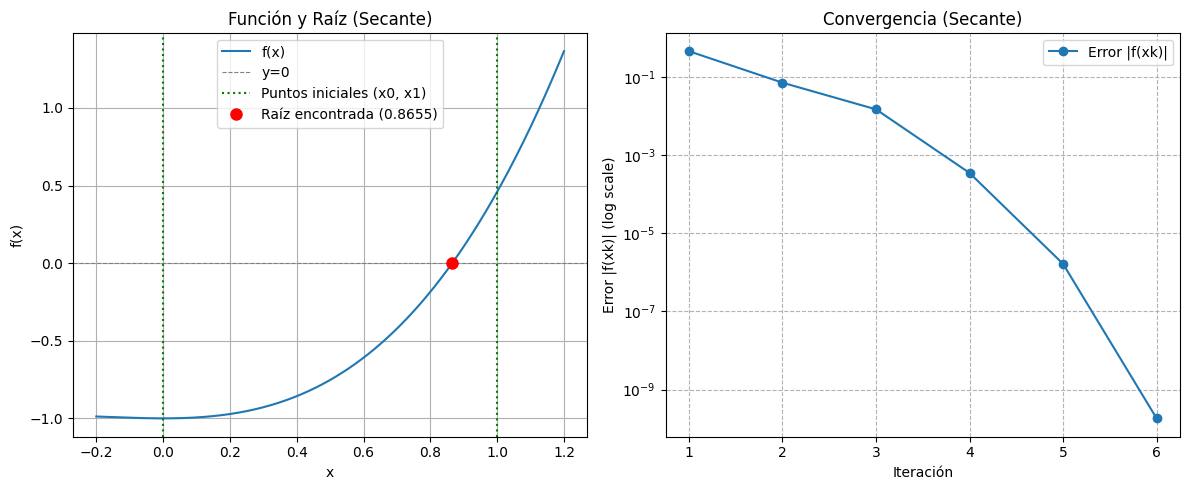

In [ ]:
if __name__ == "__main__":

    print("--- Ecuaciones no lineales via método de la secante ---")
    print("¡Hola!. Este código te proporcionará una guía paso a paso para encontrar la raíz de tu ecuación.")
    print("-" * 60)

    try:
        print("\n--- PASO 1: Ingresa tu función ---")
        print("Debes escribir la función f(x) de la cual quieres encontrar la raíz (el 'cero').")
        print("Importante: usar 'x' como la variable y usar la sintaxis de Python:")
        print("  - Ejemplos: '3*x', 'x**2', 'cos(x), sin(x), exp(x), log(x), etc.' ")

        func_string = input("Ingrese su función f(x): ")

        # Convertir texto en una función real
        x = symbols('x')
        expr = sympify(func_string)
        mi_funcion = lambdify(x, expr, 'math')

        print(f"\nFunción a resolver: f(x) = {expr}")
        print("-" * 60)

        print("\n--- PASO 2: Ingresa los puntos iniciales ---")
        print("El método de la Secante necesita dos valores iniciales (x0 y x1) para empezar.")
        print("Estos son dos puntos en el eje 'x' que tú crees que están cerca de la raíz.")

        x0_input = input("Ingrese el punto inicial (x0): ")
        x0_val = float(x0_input)

        x1_input = input("Ingrese el punto inicial (x1): ")
        x1_val = float(x1_input)
        print("-" * 60)

        print("\n--- PASO 3: Define la Tolerancia (Precisión) ---")
        print("La tolerancia (tol) es tu 'margen de error' aceptable.")
        print("Buscamos un punto 'x' donde f(x) sea *casi* cero.")
        print("Esta tolerancia le dice al programa qué tan 'casi cero' es aceptable.")
        print("  - Un valor común y muy preciso es '1e-7' (que es 0.0000001).")
        print("  - Un valor más pequeño (ej. '1e-10') es MÁS preciso, pero puede tardar más.")

        tol_input = input(f"Ingrese la tolerancia (o presione Enter para 1e-7): ")

        if tol_input == "":
            tol_val = 1e-7
            print(f"Usando tolerancia por defecto: {tol_val}")
        else:
            tol_val = float(tol_input)
        print("-" * 60)

        print("\n¡Excelente! Todo listo. Calculando la solución...")
        solver_secante = SecantSolver(f=mi_funcion)

        print(f"Iniciando SecantSolver para f(x) con x0={x0_val}, x1={x1_val}...")
        raiz_aprox = solver_secante.solve(x0=x0_val, x1=x1_val, tol=tol_val)

        f_en_raiz = mi_funcion(solver_secante.root)
        print("\n--- Resultados Técnicos del Solver ---")
        print(f"Raíz encontrada:     {solver_secante.root:.8f}")
        print(f"Valor de f(raíz):    {f_en_raiz:.2e}")
        print(f"Iteraciones:         {solver_secante.iterations}")
        print(f"Error estimado |f(c)|: {solver_secante.error:.2e}")

        print("\n" + "="*60)
        print("      --- Resumen de Estimación para el Cliente ---")
        print("="*60)
        print(f"\nProyecto: Análisis de la función f(x) = {expr}")

        print("\n> **1. Problema:**")
        print(f"> Se nos solicitó encontrar el 'punto de equilibrio' (raíz) de la función, es decir, \n> el valor de 'x' para el cual la función es igual a cero.")

        print("\n> **2. Estimación de la Solución:**")
        print(f"> El valor de 'x' que resuelve la ecuación es: **{solver_secante.root:.10f}**")

        print("\n> **3. Nivel de Confianza (Precisión):**")
        print(f"> La estimación es de alta precisión. Al evaluar la función en este punto, el resultado es \n> {f_en_raiz:.2e} (un número extremadamente cercano a cero).")
        print(f"> El cálculo se completó eficientemente en **{solver_secante.iterations} pasos**.")

        print("\n> **4. Visualización:**")
        print(f"> A continuación, te presento los gráficos que ilustran la solución encontrada y la \n> eficiencia del método.")
        print("> Gráfico 1: Muestra tu función y el punto dónde se encontró la raíz.")
        print("> Gráfico 2: Muestra qué tan rápido el método encontró la solución.")
        print("="*60 + "\n")

        solver_secante.plot_results()

    except (SympifyError, ValueError, RuntimeError) as e:
        print(f"\n[ERROR] Ocurrió un problema:")
        print(f"{e}")
    except Exception as e:
        print(f"\n[ERROR INESPERADO] {e}")